In [1]:
# Import the necessary packages 

In [57]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
from keras.utils import to_categorical

In [58]:
#. Load the training and testing data (MNIST/CIFAR10)
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [59]:
x_train.shape

(60000, 28, 28)

In [60]:
#normalisation
x_train=x_train/255
x_test=x_test/255

In [61]:
x_train.shape

(60000, 28, 28)

In [62]:

model=keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128,activation="relu"),
        keras.layers.Dense(10,activation="softmax")
    ]
)

In [63]:
model.summary() 

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ flatten_6 (Flatten)      │ (None, 784)       │         0 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_15 (Dense)         │ (None, 128)       │   100,480 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_16 (Dense)         │ (None, 10)        │     1,290 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
#Train the model using SGD 
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [66]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9266 - loss: 0.2620 - val_accuracy: 0.9354 - val_loss: 0.2352
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9348 - loss: 0.2340 - val_accuracy: 0.9409 - val_loss: 0.2168
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9409 - loss: 0.2162 - val_accuracy: 0.9426 - val_loss: 0.2032
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9454 - loss: 0.1980 - val_accuracy: 0.9442 - val_loss: 0.1895
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9480 - loss: 0.1866 - val_accuracy: 0.9495 - val_loss: 0.1784


In [68]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss: %.3f" % test_loss)
print("Test accuracy: %.2f%%" % (test_acc * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9398 - loss: 0.2066
Test loss: 0.178
Test accuracy: 94.95%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


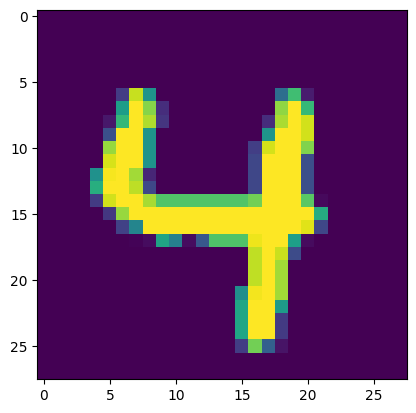

In [82]:
pre_value=model.predict(x_test)
n=random.randint(0,999)
plt.imshow(x_test[n])
plt.show()
plt.show()

In [83]:
print(pre_value[n])

[4.3795364e-07 1.4593742e-07 8.0465970e-06 1.6342861e-05 9.9727964e-01
 1.0507796e-06 9.4178931e-06 4.4318565e-04 1.3376872e-05 2.2283425e-03]


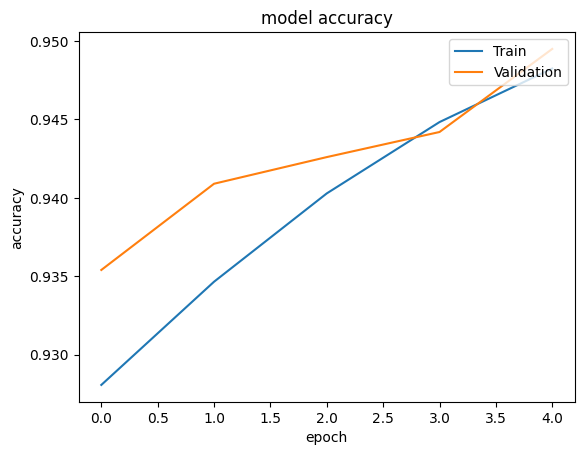

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'],loc="upper right")
plt.show()

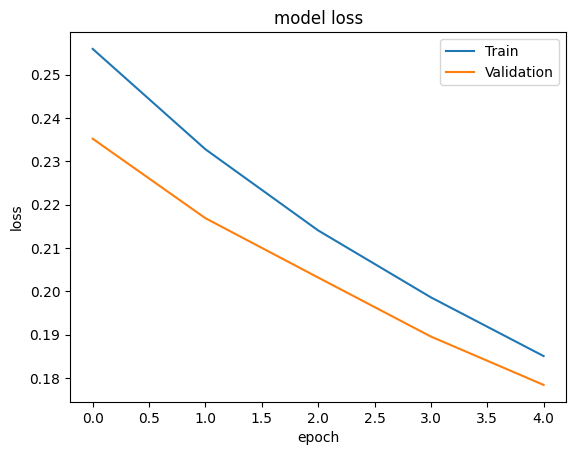

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Validation'],loc="upper right")
plt.show()

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pre_value.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.93      0.95      0.94      1010
           4       0.95      0.94      0.94       982
           5       0.97      0.92      0.94       892
           6       0.94      0.97      0.96       958
           7       0.95      0.94      0.95      1028
           8       0.94      0.93      0.93       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

